In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DL_2021/FinalProject

/content/drive/MyDrive/DL_2021/FinalProject


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with h5py.File('./nyu_depth_v2_labeled.mat', 'r') as f:
    depth_map = np.array(f.get('depths'))
    raw_img = np.array(f.get('images'))
f.close()

In [ ]:
raw_img.shape

(1449, 3, 640, 480)

## Show images and depth maps

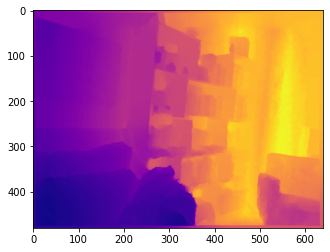

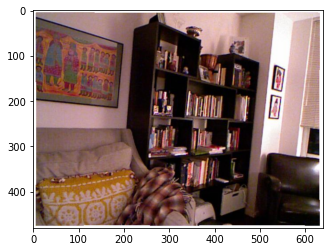

In [ ]:
# to do: show some samples
i = 50
depth = depth_map[i]
depth = depth.transpose(1,0)
plt.imshow(depth,cmap='jet')
plt.show()
a = raw_img[i]
a = a.transpose(2,1,0)
plt.imshow(a)
plt.show()

*Objects* distances ∈ (0.7132995, 9.99547)




In [ ]:
print(depth_map.min())
print(depth_map.max())

0.7132995
9.99547


In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/nianticlabs/monodepth2

Cloning into 'monodepth2'...
remote: Enumerating objects: 176, done.
remote: Total 176 (delta 0), reused 0 (delta 0), pack-reused 176
Receiving objects: 100% (176/176), 10.27 MiB | 9.97 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [ ]:
%cd /content/monodepth2

/content/monodepth2


In [ ]:
!python test_simple.py --image_path ./test.jpeg --model_name mono+stereo_640x192

-> Loading model from  models/mono+stereo_640x192
   Loading pretrained encoder
   Loading pretrained decoder
-> Predicting on 1 test images
   Processed 1 of 1 images - saved predictions to:
   - ./test_disp.jpeg
   - ./test_disp.npy
-> Done!


In [ ]:
depth = np.load ('/content/monodepth2/assets/test_image_disp.npy')

In [ ]:
print(depth.shape)

(1, 1, 192, 640)


In [ ]:
print(depth.max())
print(depth.min())


1.0063726
0.04472684


In [ ]:
from PIL import Image
im = Image.fromarray(raw_img[0].transpose(2,1,0))
im.save("test.jpeg")

In [ ]:
print(raw_img[0].shape)

(3, 640, 480)
